First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Info and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -------------

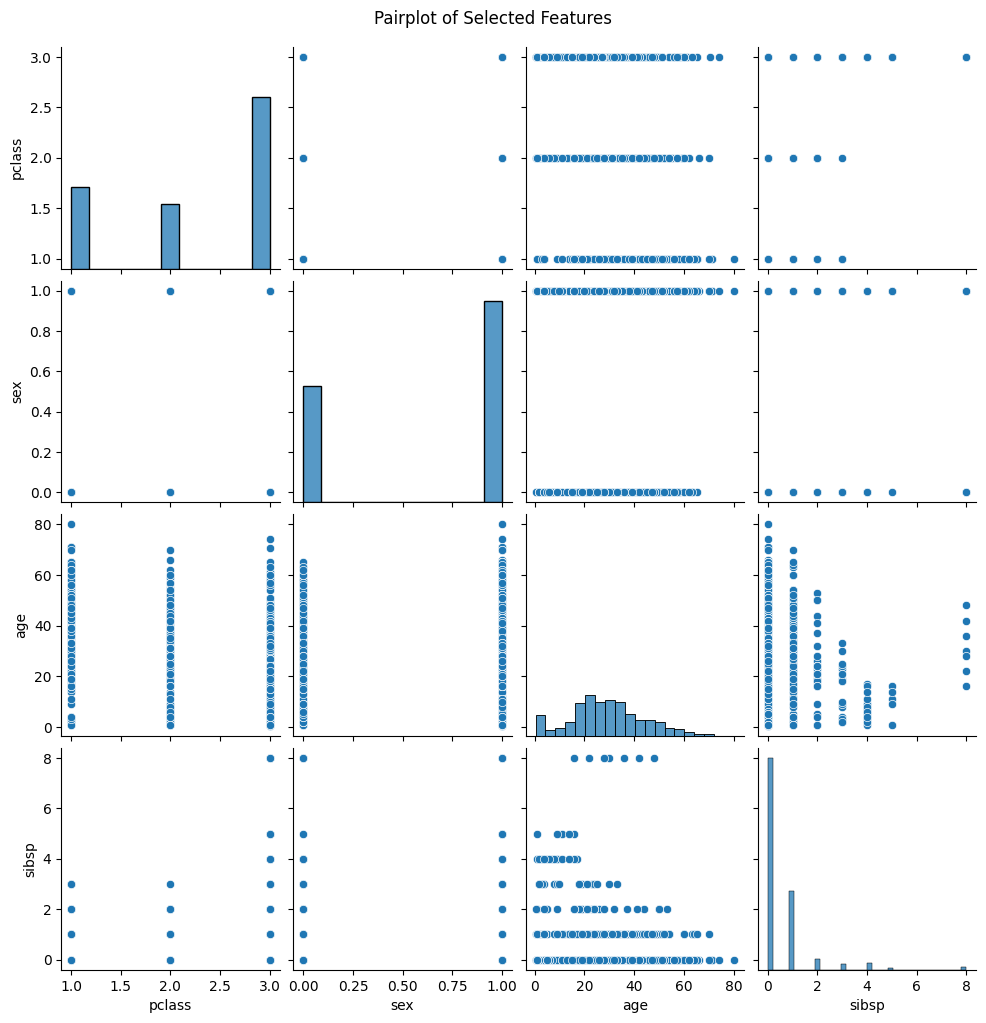

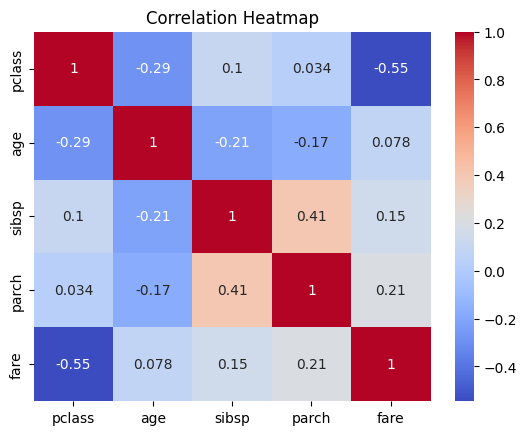

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

titanic = sns.load_dataset('titanic')

print("First 5 rows:")
print(titanic.head())

print("\nInfo and missing values:")
print(titanic.info())

print("\nMissing values count per column:")
print(titanic.isnull().sum())

titanic['age'] = titanic['age'].ffill().bfill()


if 'unknown' not in titanic['deck'].cat.categories:
    titanic['deck'] = titanic['deck'].cat.add_categories('unknown')

titanic['deck'] = titanic['deck'].fillna('unknown')
top_decks = titanic['deck'].value_counts().nlargest(4).index.tolist()
titanic['deck'] = titanic['deck'].apply(lambda x: x if x in top_decks else 'other')

print("\nUnique decks after limiting:")
print(titanic['deck'].unique())

titanic.drop_duplicates(inplace=True)

le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])

scaler = StandardScaler()
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())
titanic['fare_scaled'] = scaler.fit_transform(titanic[['fare']])

sns.pairplot(titanic[['pclass', 'sex', 'age', 'sibsp']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

corr_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
corr = titanic[corr_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()